In [266]:
import matplotlib.pyplot as plt
from itertools import accumulate
from scipy.stats import norm
from statistics import mean,variance
from math import sqrt,log
import csv

In [135]:
def split(f,g,R) :
    ra,rb = min(R),max(R)
    return min([(r,f(ra,r) + g(r,rb)) for r in R],key = lambda x : x[1])
    

In [165]:
def amoc(g,R,beta) :
    def f(i,j) : return 0 if i == j else g(i,j-1) + beta
    return split(f,g,R)
    

In [180]:
def op(g,R,beta) :
    class functor :
        def __init__(self) :
            self.D = {}
        def add(self,x,y) :
            self.D[x] = y
        def __call__(self,*arg) :
            _,x = arg
            return self.D[x]
    f = functor()
    T = segmentation = []
    cost = -beta
    for r in R :
        f.add(r,cost + beta)
        T.append(r)
        index,cost = split(f,g,T)
        res.append((index,cost))
    return res
    

In [264]:
def pelt(g,R,beta) :
    class functor :
        def __init__(self) :
            self.D = {}
        def add(self,x,y) :
            self.D[x] = y
        def __call__(self,*arg) :
            _,x = arg
            return self.D[x]
    ra = min(R)
    f = functor()
    T = segmentation = []
    cost = -beta
    for r in R :
        f.add(r,cost + beta)
        T.append(r)
        T = [t for t in T if f(ra,t) + g(t,r) + beta <= f(ra,r)]
        index,cost = split(f,g,T)
        segmentation.append((index,cost))           
    return segmentation

In [137]:
class sumstats :
    def __init__(self,X) :
        self.X = X
        self.SX = [0] + list(accumulate(X))
        self.SXX = [0] + list(accumulate([x*x for x in X]))

In [138]:
class normal_mean :
    def __init__(self,X) :
        self.sumstats = sumstats(X)
    def __call__(self,i,j) :
        val = self.sumstats.SX[j+1] - self.sumstats.SX[i]
        val *= val
        val /= (j - i + 1)
        val = -val
        val += self.sumstats.SXX[j+1] - self.sumstats.SXX[i]
        return val

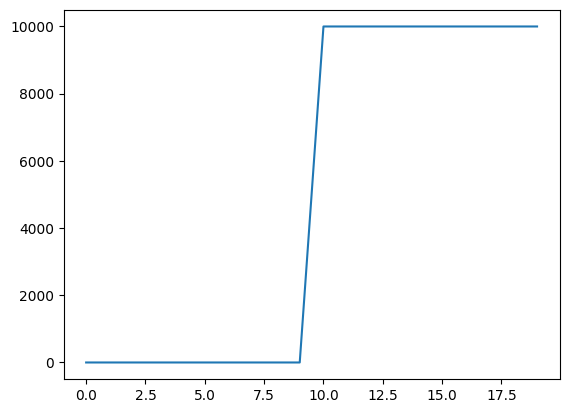

In [45]:
Z = [0 for i in range(10)] + [10000 for i in range(10)]
plt.plot(Z)
plt.show()

In [48]:
g = normal_mean(Z)

In [49]:
amoc(g,list(range(20)),0)

(9, 90909090.90909088)

In [51]:
Z[10]

10000

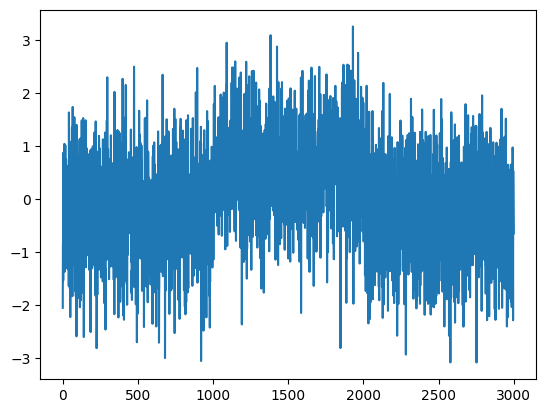

In [244]:
X = [0.0 for i in range(1000)] + [1.0 for i in range(1000)] + [0.0 for i in range(1000)]
E = norm.rvs(size=3000)
Z = [x+e for x,e in zip(X,E)]
mu = mean(Z)
sigma = sqrt(variance(Z))
Z = [(z-mu)/sigma for z in Z]
plt.plot(Z)
plt.show()

In [219]:
g = normal_mean(Z)
res = amoc(g,list(range(2000)),2*log(2000))
res

(998, 1606.6883815572232)

In [229]:
g = normal_mean(Z)
res = op(g,list(range(3000)),2*log(3000))

In [265]:
g = normal_mean(Z)
res = pelt(g,list(range(3000)),2*log(3000))

ValueError: min() arg is an empty sequence

In [267]:
file = open("X.csv", "r")
X = list(csv.reader(file, delimiter=","))
X = [float(item) for sublist in X for item in sublist]
file.close()
print(mean(X),sqrt(variance(X)))

-3.9863529867114243e-17 1.0


In [268]:
g = normal_mean(X)
res = op(g,list(range(3000)),2*log(3000))

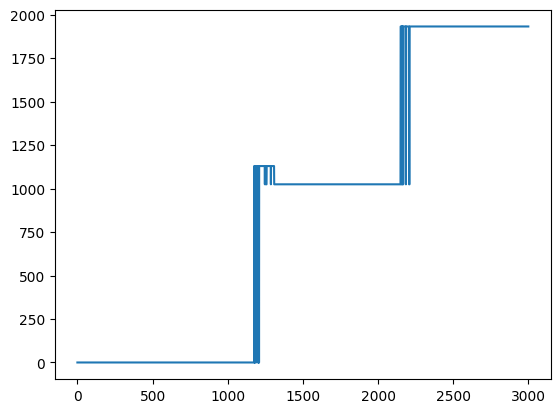

In [269]:
blob = [cpt for cpt,_ in res]
plt.plot(blob)

In [270]:
res[2999]

(1933, 2976.2423545051665)

In [271]:
res[1933]

(1025, 1994.232232316177)

In [272]:
res[1025]

(0, 1016.3121868397028)

In [116]:
2*log(2000)

15.201804919084164

In [133]:
g(0,1999)

1999.000000000002

In [134]:
g(0,353) + g(354,1999)

1991.4177546831875

In [129]:
res

(353, 2006.6603076271012)